Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [ ]:
import sqlite3
import pandas as pd
import plotly.express as px
import math
import pandas as pd
import matplotlib.pyplot as plt


# Connect to the SQLite database
conn = sqlite3.connect('mydatabase.db')

# Define the SQL query to join the bike_station_data with df_places_four
query_four = """
    SELECT *
    FROM bike_station_data
    JOIN df_places_four ON bike_station_data.`Station ID` = df_places_four.`Station ID`
"""

# Execute the query and retrieve the result as a DataFrame
joined_data_four_df = pd.read_sql_query(query_four, conn)

# Define the SQL query to join the bike_station_data with df_places_yelp
query_yelp = """
    SELECT *
    FROM bike_station_data
    JOIN df_places_yelp ON bike_station_data.`Station ID` = df_places_yelp.`Station ID`
"""

# Execute the query and retrieve the result as a DataFrame
joined_data_yelp_df = pd.read_sql_query(query_yelp, conn)

# Close the connection to the database
conn.close()

# Print the joined data with df_places_four
print(joined_data_four_df)

# Save the joined data with df_places_four as a CSV file
joined_data_four_df.to_csv('joined_dataframe_four.csv', index=False)

# Print the joined data with df_places_yelp
print(joined_data_yelp_df)

# Save the joined data with df_places_yelp as a CSV file
joined_data_yelp_df.to_csv('joined_dataframe_yelp.csv', index=False)


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [ ]:
# Function to calculate the distance between two points using the Haversine formula (This formula was found on Stack Overflow)
def calculate_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Haversine formula
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = math.sin(dlat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    radius = 6371  # Radius of the Earth in kilometers
    distance = radius * c

    return distance

# Load the joined data from CSV files
df_four = pd.read_csv('joined_dataframe_four.csv')
df_yelp = pd.read_csv('joined_dataframe_yelp.csv')

# Create a new column in each DataFrame to store the distance
df_four['Distance'] = 0.0
df_yelp['Distance'] = 0.0

# Iterate over each row in the DataFrame
for index, row in df_four.iterrows():
    hub_lat = row['Latitude']  # Latitude of the hub
    hub_lon = row['Longitude']  # Longitude of the hub
    bus_lat = row['LatitudeB']  # Latitude of the business
    bus_lon = row['LongitudeB']  # Longitude of the business

    # Calculate the distance between the hub and the business using the Haversine formula
    distance = calculate_distance(hub_lat, hub_lon, bus_lat, bus_lon)

    # Assign the calculated distance to the 'Distance' column
    df_four.at[index, 'Distance'] = distance

# Repeat the process for the Yelp data
for index, row in df_yelp.iterrows():
    hub_lat = row['Latitude']  # Latitude of the hub
    hub_lon = row['Longitude']  # Longitude of the hub
    bus_lat = row['LatitudeB']  # Latitude of the business
    bus_lon = row['LongitudeB']  # Longitude of the business

    # Calculate the distance between the hub and the business using the Haversine formula
    distance = calculate_distance(hub_lat, hub_lon, bus_lat, bus_lon)

    # Assign the calculated distance to the 'Distance' column
    df_yelp.at[index, 'Distance'] = distance

# Print the updated DataFrames
print("FourSquare Data:")
print(df_four)

print("Yelp Data:")
print(df_yelp)

# Save the updated DataFrames to CSV files
df_four.to_csv('joined_dataframe_four.csv', index=False)
df_yelp.to_csv('joined_dataframe_yelp.csv', index=False)




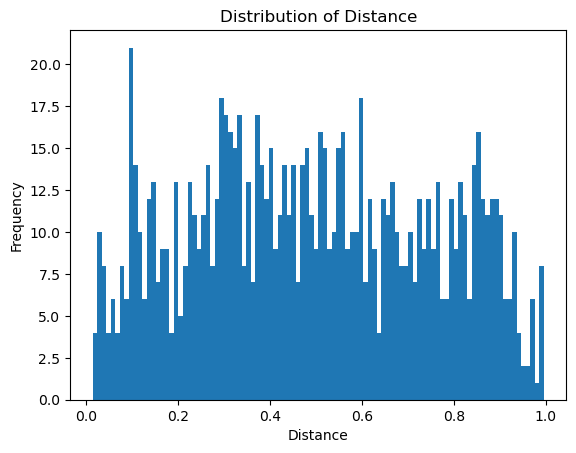

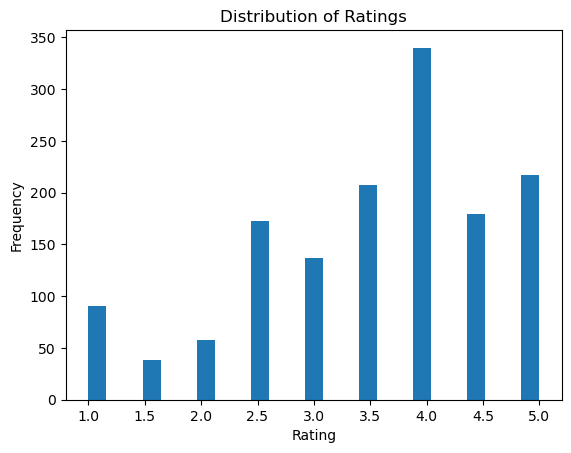

In [29]:
##Histogram of Distance for each dataset
# Load the CSV file into a pandas DataFrame
data = pd.read_csv('joined_dataframe_four.csv')

# Plot a histogram of the "distance" column
plt.hist(data['Distance'], bins=100)  
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Distance')
plt.show()

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('joined_dataframe_yelp.csv')

# Filter the DataFrame to include only values up to a distance of 4

# Plot a histogram of the "distance" column
plt.hist(data['Rating'], bins=25)  
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()



In [30]:
# Read the CSV file
data = pd.read_csv('joined_dataframe_four.csv')

# Calculate the average distance for each instance of the same name
grouped_data = data.groupby('Name').mean().reset_index()

# Create a scatter mapbox plot
fig = px.scatter_mapbox(data, lat='Latitude', lon='Longitude', hover_data=['Name', 'Distance'],
                        color='Distance', color_continuous_scale='Viridis', zoom=13, height=1000)

fig.update_traces(marker={'size': 15})

# Update the layout
fig.update_layout(mapbox_style='open-street-map')

# Show the plot
fig.show()

C:\Users\Nikola\AppData\Local\Temp\ipykernel_24964\1665082568.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = data.groupby('Name').mean().reset_index()


In [31]:
# Read the CSV file
data = pd.read_csv('joined_dataframe_yelp.csv')

# Filter the data to exclude distances over 5
filtered_data = data[data['Distance'] <= 5]

# Calculate the average distance for each instance of the same name
grouped_data = filtered_data.groupby('Name').mean().reset_index()

# Create a scatter mapbox plot
fig = px.scatter_mapbox(grouped_data, lat='Latitude', lon='Longitude', hover_data=['Name', 'Rating'],
                        color='Rating', color_continuous_scale='Viridis', zoom=13, height=1000)
fig.update_traces(marker={'size': 15})

# Update the layout
fig.update_layout(mapbox_style='open-street-map')

# Show the plot
fig.show()


C:\Users\Nikola\AppData\Local\Temp\ipykernel_24964\853186200.py:11: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [44]:
# Read the CSV file
df = pd.read_csv('joined_dataframe_yelp.csv')

# Sort the DataFrame by the "Rating" column in descending order
sorted_df = df.sort_values(by='Rating', ascending=False)

# Select the top ten rows with the highest ratings
top_ten = sorted_df.head(10)

# Display the "Rating", "Name.1", and "Name" columns of the top ten rows
top_ten_data = top_ten[['Rating', 'Name.1', 'Name']]
print(top_ten_data)


      Rating                      Name.1                   Name
1439     5.0                   Undefined  King William at James
293      5.0  People Under The Staircase        King at Dundurn
312      5.0            Delirious Burger        Locke at Hunter
1000     5.0    Cadillac Jax Bar & Grill        Tisdale at Main
302      5.0            Delirious Burger      Charlton at Locke
1015     5.0             Phin Coffee Bar           Frid at Main
597      5.0                  Hargitai's     Victoria at Barton
1022     5.0                  HMCS Haida         James at Guise
1025     5.0              North End Pita         James at Guise
1036     5.0  Tall Tree Sandwich Company                Stadium


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [41]:
import sqlite3
import pandas as pd

# Create your connection.
conn = sqlite3.connect('mydatabase.db')

# Read in the data
bike_station_data = pd.read_csv('bike_station_data.csv')
df_places_four = pd.read_csv('df_places_four.csv')
df_places_yelp = pd.read_csv('df_places_yelp.csv')
joined_data_four_df = pd.read_csv('joined_dataframe_four.csv')
joined_data_yelp_df = pd.read_csv('joined_dataframe_yelp.csv')

# Write the data to a sqlite table
bike_station_data.to_sql('bike_station_data', conn, if_exists='replace', index=False)
df_places_four.to_sql('df_places_four', conn, if_exists='replace', index=False)
df_places_yelp.to_sql('df_places_yelp', conn, if_exists='replace', index=False)
joined_data_four_df.to_sql('joined_data_four_df', conn, if_exists='replace', index=False)
joined_data_yelp_df.to_sql('joined_data_yelp_df', conn, if_exists='replace', index=False)


1440

Look at the data before and after the join to validate your data.

In [42]:
conn = sqlite3.connect('mydatabase.db')


# Retrieve data from the 'bike_station_data' table
bike_station_data_query = "SELECT * FROM bike_station_data"
bike_station_data_df = pd.read_sql_query(bike_station_data_query, conn)

# Retrieve data from the 'df_places_four' table
df_places_four_query = "SELECT * FROM df_places_four"
df_places_four_df = pd.read_sql_query(df_places_four_query, conn)

# Retrieve data from the 'df_places_yelp' table
df_places_yelp_query = "SELECT * FROM df_places_yelp"
df_places_yelp_df = pd.read_sql_query(df_places_yelp_query, conn)


print("bike_station_data:")
print(bike_station_data_df)

print("df_places_four:")
print(df_places_four_df)

print("df_places_yelp:")
print(df_places_yelp_df)

conn.close()

bike_station_data:
    Station ID                     Name   Latitude  Longitude  \
0      hub_435                Gore Park  43.256317 -79.868664   
1      hub_436  James North at Mulberry  43.261819 -79.866743   
2      hub_527                Seedworks  43.259111 -79.863613   
3      hub_530  Cootes at York and King  43.265581 -79.949656   
4      hub_535           Osler at Grant  43.259550 -79.942643   
..         ...                      ...        ...        ...   
139   hub_5845           Jackson Square  43.256935 -79.869577   
140   hub_5846         Cannon at Steven  43.256461 -79.849981   
141   hub_5883          RBG Rock Garden  43.289479 -79.891693   
142   hub_5903                   Pier 8  43.275289 -79.856907   
143   hub_6148    King William at James  43.257392 -79.867902   

     Number of Bikes Available  
0                            7  
1                            2  
2                            2  
3                           11  
4                            1  
..